Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\programs\miniconda3\envs\uasa-trends\lib\site-packages\wosis\query.py:49: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  wos_config = yaml.load(config)


In [3]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

<hr> Convert manually sorted papers to dataframe

In [4]:
software_packages = pd.read_csv('{}/uasa_software_phrases_sorted_2019-03-01.csv'.format(DATA_DIR))

In [5]:
software_packages

,relevant,DOI,title,1,2,3,4,5
0,?,10.1117/1.JRS.7.073591,Determination of the overlap factor and its en...,The problem of overlap factor (OVF) computatio...,A sensitivity analysis is carried out as a fun...,Insertion of a field lens proves to be an eleg...,Parametric simulations are carried out to show...,The ray-tracing approach presented here is str...
1,No (not related to environment),10.1615/Int.J.UncertaintyQuantification.201601...,SOFTWARE RELIABILITY GROWTH MODEL WITH TEMPORA...,Increasingly software systems are developed to...,Based on a stochastic model of the software fa...,"To validate our model, we consider five partic...",Experimental comparisons with existing methods...,"Based on the stochastic model, the analytical ..."
2,?,10.2166/wqrjc.2011.028,A simulation of the fate of nitrogen in an on-...,"Following a sensitivity analysis, the model wa...",Modeling was performed with the GPS-X (TM) sof...,The calibrated model shows a good agreement wi...,Modeling of residential wastewater treatment a...,Obtained results show that the studied pilot u...
3,?,10.1002/2017WR020814,"A Practical, Robust Methodology for Acquiring ...",These predictions often contain a significant ...,Regional groundwater flow models play an impor...,One way to reduce this uncertainty is to colle...,The so-called Null-Space Monte Carlo method is...,The method incorporates any existing informati...
4,No (not related to environment),10.1002/cnm.2615,Verification of computational models of cardia...,"The field of 'verification, validation and unc...","The first stage, verification, is the evaluati...",These problems are carefully constructed so th...,For computational models of cardiac activity t...,We define D-D model problems with exact soluti...
5,No,10.1016/j.watres.2009.03.017,Nitritation performance and biofilm developmen...,Mathematical simulations of these two geometri...,The modeling simulations demonstrated that Ki ...,The experimental results showed that the count...,mg L-) and high pH (.-.,Sensitivity analysis results showed that the o...
6,?,10.1214/14-BA909,Sensitivity Analysis for Bayesian Hierarchical...,We propose a novel formal approach to prior se...,Other formal approaches to prior sensitivity a...,"Despite its importance, informal approaches to...",It quantifies sensitivity without the need for...,Prior sensitivity examination plays an importa...
7,Yes - NEVA,10.1007/s10584-014-1254-5,Non-stationary extreme value analysis in a cha...,The software presents the results of non-stati...,NEVA includes posterior probability intervals ...,This framework is implemented in the Non-stati...,We evaluate both stationary and non-stationary...,This paper introduces a framework for estimati...
8,Yes,10.1061/(ASCE)CP.1943-5487.0000239,Study of MEPDG Sensitivity Using Nonparametric...,Using four-layer pavement geometry [two asphal...,Because the new Mechanistic-Empirical Pavement...,"Instead, nonparametric regression procedures c...",Thirty inputs are used to randomly generate i...,"In addition to these, alligator cracking is hi..."
9,Yes - GUI-HDMR,10.1016/j.envsoft.2008.12.002,GUI-HDMR - A software tool for global sensitiv...,The developed GUI-HDMR software copes very wel...,GUI-HDMR can be applied to a wide range of app...,The high dimensional model representation (HDM...,The HDMR software described here combines the ...,The performance of the GUI-HDMR software has b...


In [6]:
software_rc = wosis.find_pubs_by_doi(RC, software_packages.DOI)

<hr>Analysing the software data
<br> - Keyword trend
<br> - Publication trend

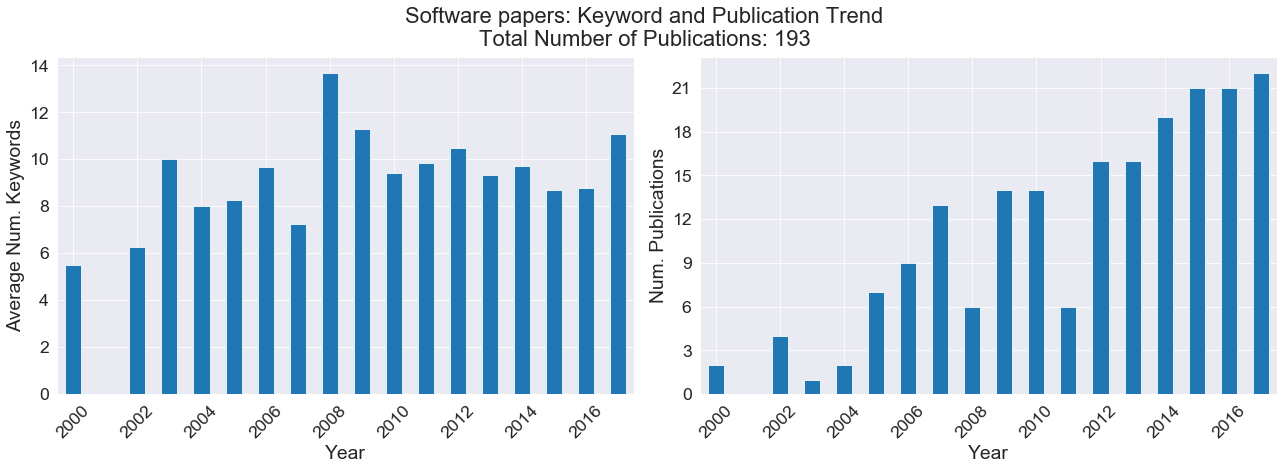

In [7]:
wos_plot.plot_kw_trend(software_rc, title='Software papers: Keyword and Publication Trend')

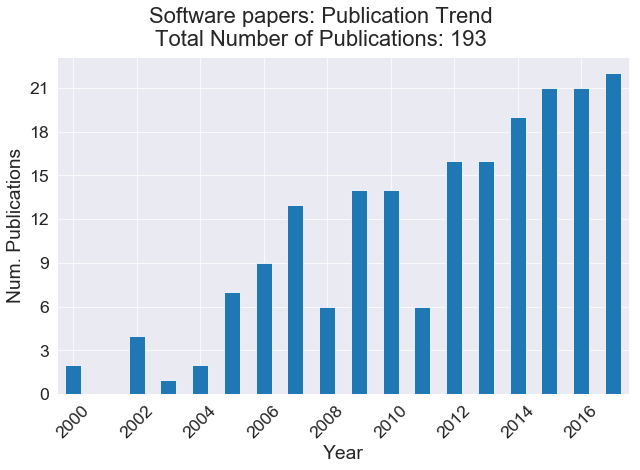

In [8]:
wos_plot.plot_pub_trend(software_rc, title='Software papers: Publication Trend')

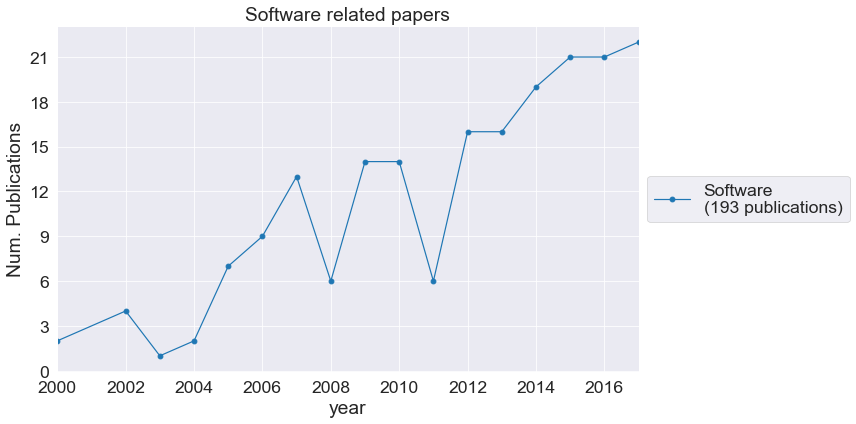

In [9]:
software_rc.name = 'Software'
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Software related papers')

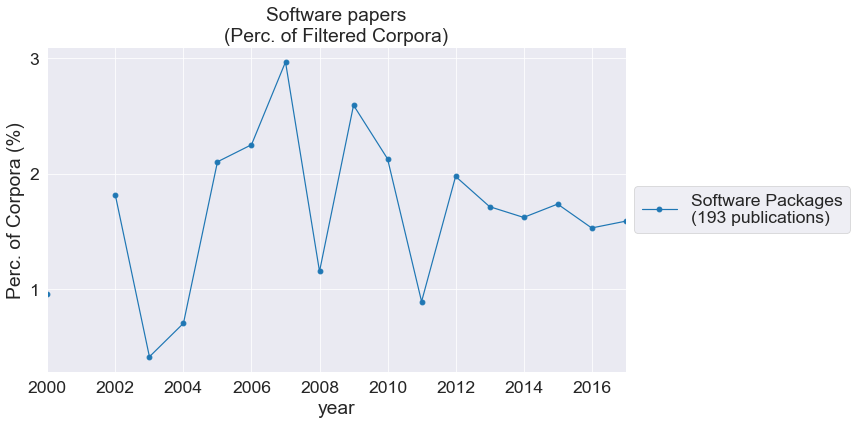

In [10]:
software_rc.name = 'Software Packages'
wos_plot.plot_topic_trend([software_rc], total_rc=RC, title='Software papers\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/Figure_12'.format(FIG_DIR))

<hr> 
   - Identifying UA/SA/optimization in the corpora <br>
   - Ploting keyword, publication, and topic trend

In [11]:
UQ = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [12]:
all_uq = UQ.combine_recs()

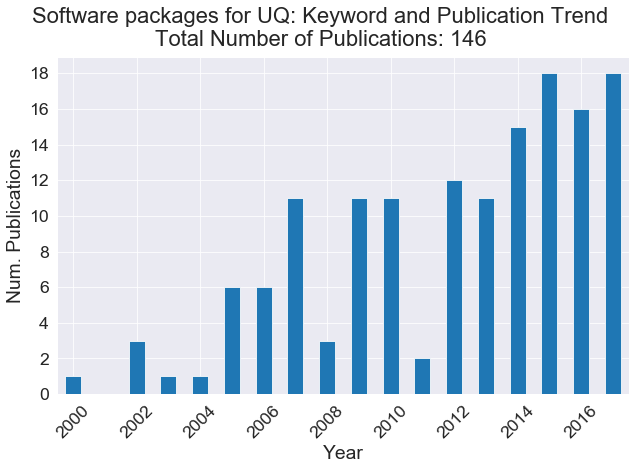

In [13]:
wos_plot.plot_pub_trend(all_uq, title='Software packages for UQ: Keyword and Publication Trend', 
                       save_plot_fn='{}/Figure_14_c.png'.format(FIG_DIR))

In [14]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [15]:
all_sa = SA.combine_recs()

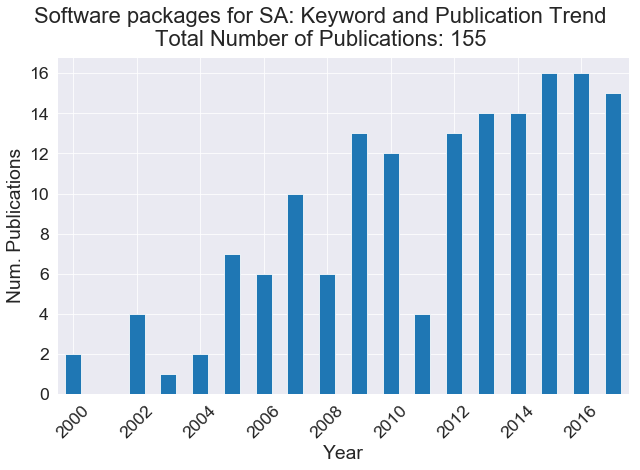

In [16]:
wos_plot.plot_pub_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', 
                       save_plot_fn='{}/Figure_14_b.png'.format(FIG_DIR))

In [17]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [18]:
all_optimization = optimization.combine_recs()

In [19]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Parameter estimation and uncertainty analysis for a watershed model']

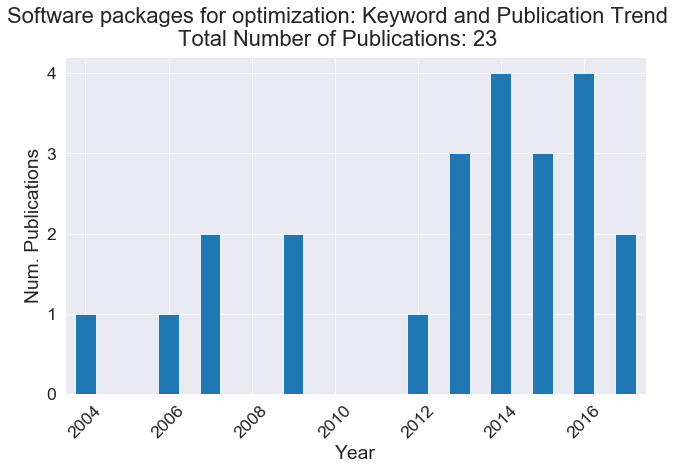

In [20]:
wos_plot.plot_pub_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', \
                       save_plot_fn='{}/Figure_14_a.png'.format(FIG_DIR))

In [21]:
all_uq.name = 'UQ'
all_sa.name = 'SA'
all_optimization.name = 'Optimization'

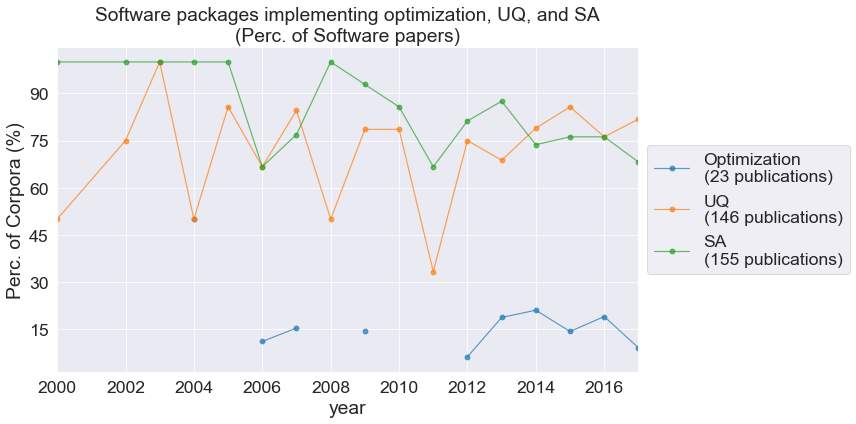

In [22]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], total_rc=software_rc, 
                          title='Software packages implementing optimization, UQ, and SA\n(Perc. of Software papers)', 
                          save_plot_fn='{}/Figure_13_b.png'.format(FIG_DIR))

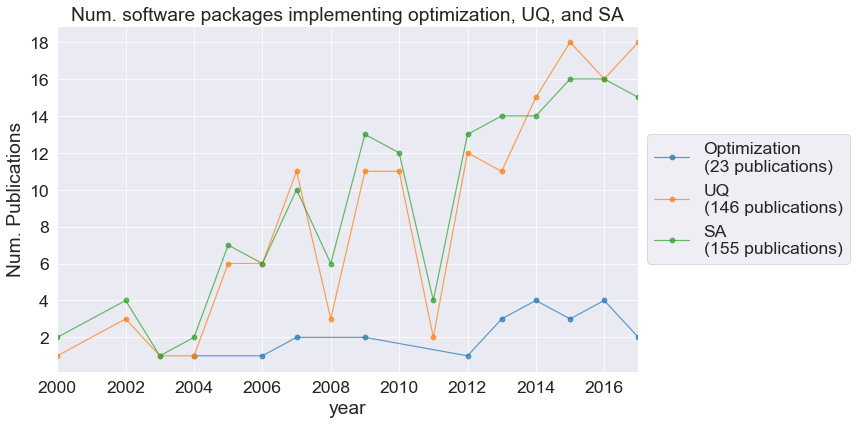

In [23]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], 
                          title='Num. software packages implementing optimization, UQ, and SA', 
                          save_plot_fn='{}/Figure_13_a.png'.format(FIG_DIR))

<hr>
Plotting applications and software corpora on common axes to identify trends.

In [24]:
applications = pd.read_csv('{}/all_applications.csv'.format(DATA_DIR))

Error occured getting: WOS:000229668900012 does it exist in the RecordCollection?
Error occured getting: WOS:000414896200007 does it exist in the RecordCollection?


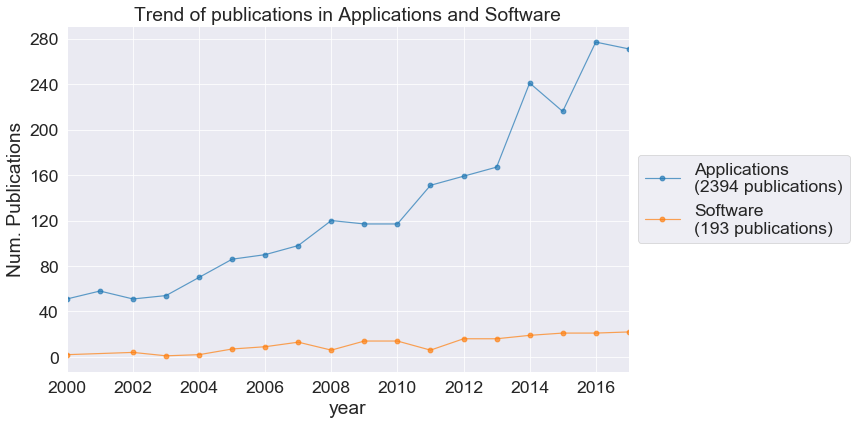

In [25]:
applications_rc = wosis.extract_recs(applications.id[:], RC)
applications_rc.name = 'Applications'
software_rc.name = 'Software'
wos_plot.plot_topic_trend([applications_rc, software_rc],
                          title='Trend of publications in Applications and Software')

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [26]:
uq_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_uq))

In [27]:
# uq_phrases.display_phrases()

In [28]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [29]:
# sa_phrases.display_phrases()

In [30]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [31]:
# opt_phrases.display_phrases()

<hr> Top-cited journals for UA/SA/optimization
<br> - Original intention was to find top cited for each three collections, but there was significant overlap, so just ran the analysis on the entire refined_software collection

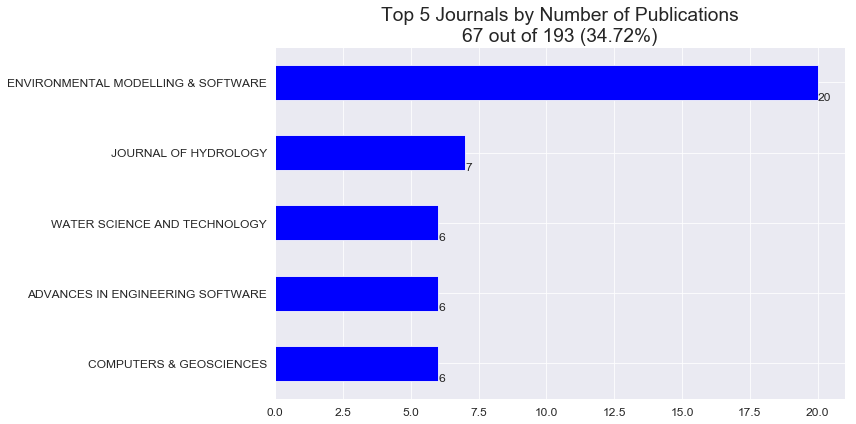

In [32]:
wos_plot.plot_pubs_per_journal(software_rc, top_n=5, annotate=True, show_stats=True)

In [33]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Water Science and Technology', 
                                                     'Advances in Engineering Software']))

pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [34]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_{}_2019-03-08'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

In [35]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)

    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)
    
collection_software.AU.str.replace("|", " | ")

0                                            Cannavo, F
1                            Brown, JD | Heuvelink, GBM
2                   Hamm, NAS | Hall, JW | Anderson, MG
3     Peckham, SD | Kelbert, A | Hill, MC | Hutton, EWH
4                               Larour, E | Schlegel, N
5                         Li, L | Boucher, A | Caers, J
6                             Gallagher, M | Doherty, J
7                                 Ziehn, T | Tomlin, AS
8                 Pianosi, F | Sarrazin, F | Wagener, T
9     Landuyt, D | Broekx, S | D'hondt, R | Engelen,...
10                               Wagener, T | Kollat, J
11    Gan, YJ | Duan, QY | Gong, W | Tong, C | Sun, ...
12        Harmel, RD | Smith, DR | King, KW | Slade, RM
13                     Zambrano-Bigiarini, M | Rojas, R
14    Burger, G | Sitzenfrei, R | Kleidorfer, M | Ra...
15    Brown, HE | Huth, NI | Holzworth, DP | Teixeir...
16                               Bertrand-Krajewski, JL
17                                          Reic

In [36]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
7,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,122,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
6,"Gallagher, M|Doherty, J",2007,Parameter estimation and uncertainty analysis ...,ENVIRONMENTAL MODELLING & SOFTWARE,122,https://dx.doi.org/10.1016/j.envsoft.2006.06.007
29,"Vu-Bac, N|Lahmer, T|Zhuang, X|Nguyen-Thoi, T|R...",2016,A software framework for probabilistic sensiti...,ADVANCES IN ENGINEERING SOFTWARE,106,https://dx.doi.org/10.1016/j.advengsoft.2016.0...
8,"Pianosi, F|Sarrazin, F|Wagener, T",2015,A Matlab toolbox for Global Sensitivity Analysis,ENVIRONMENTAL MODELLING & SOFTWARE,105,https://dx.doi.org/10.1016/j.envsoft.2015.04.009
22,"Dixon, B",2005,Applicability of neuro-fuzzy techniques in pre...,JOURNAL OF HYDROLOGY,100,https://dx.doi.org/10.1016/j.jhydrol.2004.11.010
9,"Landuyt, D|Broekx, S|D'hondt, R|Engelen, G|Aer...",2013,A review of Bayesian belief networks in ecosys...,ENVIRONMENTAL MODELLING & SOFTWARE,99,https://dx.doi.org/10.1016/j.envsoft.2013.03.011
10,"Wagener, T|Kollat, J",2007,Numerical and visual evaluation of hydrologica...,ENVIRONMENTAL MODELLING & SOFTWARE,87,https://dx.doi.org/10.1016/j.envsoft.2006.06.017
0,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,COMPUTERS & GEOSCIENCES,78,https://dx.doi.org/10.1016/j.cageo.2012.03.008
11,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,76,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
12,"Harmel, RD|Smith, DR|King, KW|Slade, RM",2009,Estimating storm discharge and water quality d...,ENVIRONMENTAL MODELLING & SOFTWARE,66,https://dx.doi.org/10.1016/j.envsoft.2008.12.006


In [37]:
top_cited_in_top_journals_software.to_csv('{}/top_cited_software_papers.csv'.format(DATA_DIR))

<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [38]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

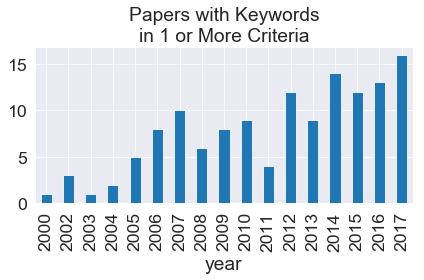

In [39]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [40]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [41]:
all_policy = policy.combine_recs()

In [42]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [43]:
# policy_phrases.display_phrases()

In [44]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [45]:
all_agri = agri.combine_recs()

In [46]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [47]:
agri_phrases.display_phrases()

Uncertainty analysis of hydrologic and water quality predictions for a small watershed using SWAT2000 (2003) 
https://dx.doi.org/10.1080/714044368 

Probability distribution functions (pdfs) for each of the  model simulations were constructed from these results. 

Developed probability distribution functions for the model provided information with desirable probability. 

This technique is applied to the Warner Creek watershed located in the Piedmont physiographic region of Maryland, and it provides an interval estimate of a range of values with an associated probability instead of a point estimate of a particular pollutant constituent. 

The uncertainty in predicted stream flow and sediment loading is large, but that for nutrient loadings is the same as that of the corresponding input parameters. 

In this study, ARRAMIS (Advanced Risk & Reliability Assessment Model) software package was used to analyze the uncertainty of the SWAT (Soil and Water Assessment Tool) outputs concerning nu

In [48]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [49]:
all_water = water.combine_recs()

In [50]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [51]:
# water_phrases.display_phrases()

In [52]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [53]:
all_enviro = enviro.combine_recs()

In [54]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [55]:
# enviro_phrases.display_phrases()

In [56]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [57]:
all_socio_ec = socio_ec.combine_recs()

In [58]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [59]:
# socio_ec_phrases.display_phrases()

In [60]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [61]:
all_med = med.combine_recs()

In [62]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [63]:
# med_phrases.display_phrases()

In [64]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [65]:
all_chem = chem.combine_recs()

In [66]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [67]:
# chem_phrases.display_phrases()

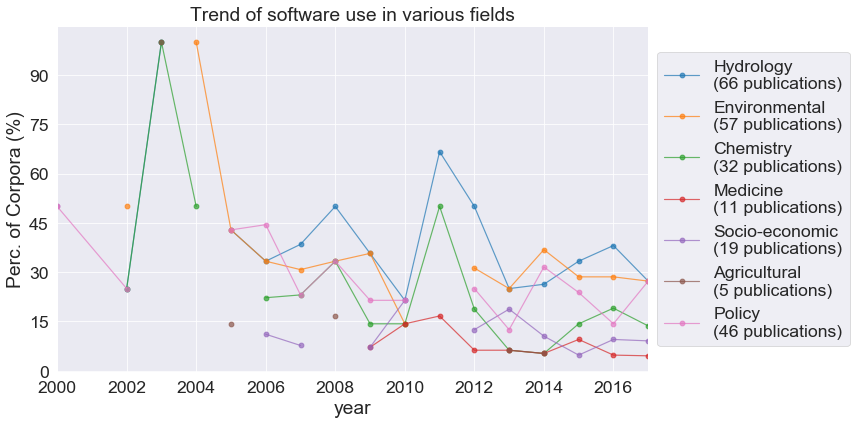

In [68]:
all_water.name = 'Hydrology'
all_enviro.name = 'Environmental'
all_chem.name = 'Chemistry'
all_med.name = 'Medicine'
all_socio_ec.name = 'Socio-economic'
all_agri.name = 'Agricultural'
all_policy.name = 'Policy'

wos_plot.plot_topic_trend([all_water, all_enviro, all_chem, all_med, all_socio_ec, all_agri, all_policy],             
                          total_rc=software_rc,
                          title='Trend of software use in various fields')

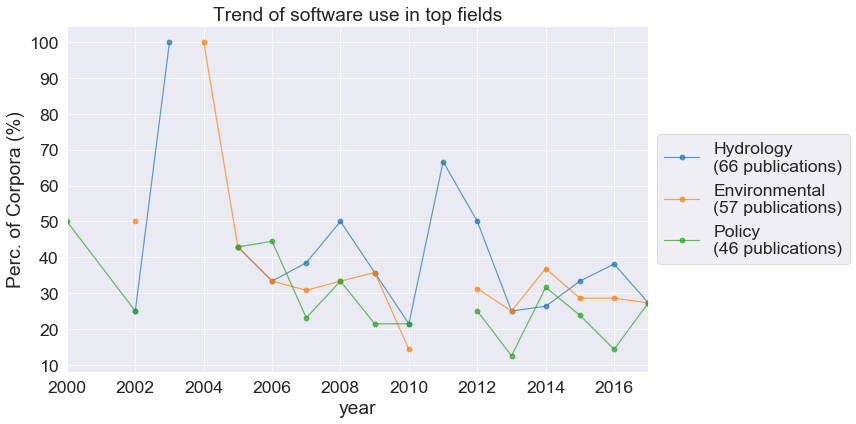

In [69]:
wos_plot.plot_topic_trend([all_water, all_enviro, all_policy],
                          title='Trend of software use in top fields',
                          total_rc=software_rc,
                          save_plot_fn='{}/Figure_10.png'.format(FIG_DIR))